In [2]:
import matplotlib.pyplot as plt
import numpy as np
import json

%matplotlib inline

In [3]:
def plot_valid_loss(path):
    with open(path, 'r') as log:
        plt.figure(figsize=((10,10)))
        log = [json.loads(i) for i in log]
        losses = np.array([[i['valid_loss'],i['jaccard_loss'],i['step']] for i in log if 'valid_loss' in i.keys() ])
        plt.plot(losses[:,2], losses[:,0], c='b')
        plt.plot(losses[:,2], losses[:,1], c='r')
        plt.show()

In [4]:
def plot_loss(path):
    with open(path, 'r') as log:
        plt.figure(figsize=((10,10)))
        log = [json.loads(i) for i in log]
        losses = np.array([[i['loss'],i['step']] for i in log if 'loss' in i.keys() ])
        plt.plot(losses[:,1], losses[:,0])
        plt.show()

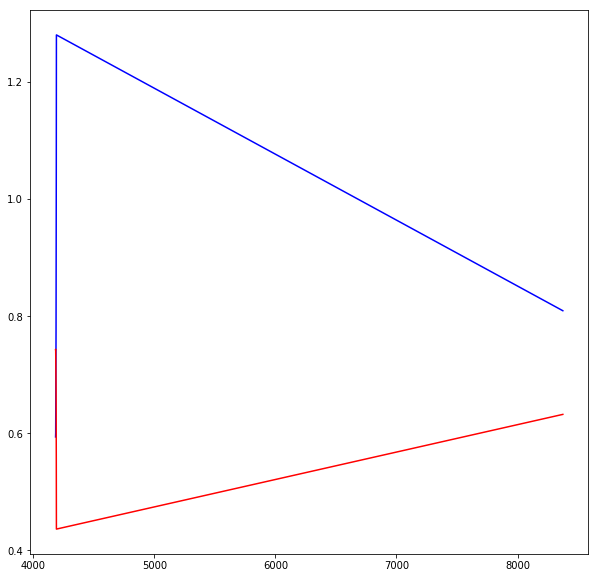

In [5]:
plot_valid_loss('../unet/runs/debug/train_0.log')

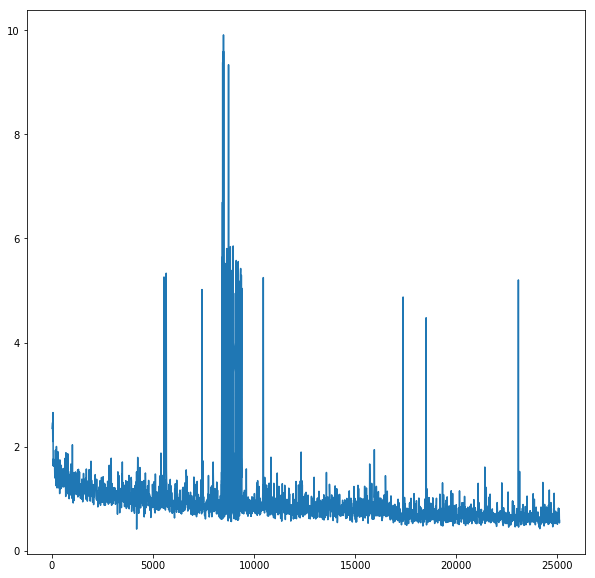

In [6]:
plot_loss('../unet/runs/debug/train_0.log')

In [7]:
def save_valid_results(inputs, targets, outputs, idx, epoch):
    fig = plt.figure(figsize=(10, 10))
    fig.add_subplot(1, 3, 1)
    plt.imshow(inputs[0][0].data.cpu().numpy())
    fig.add_subplot(1, 3, 2)
    plt.imshow(targets[0][0].data.cpu().numpy())
    fig.add_subplot(1, 3, 3)
    plt.imshow(outputs[0][0].data.cpu().numpy())
    plt.savefig('runs/valid_res/{}_{}.jpg'.format(idx, epoch))
    plt.close(fig)